In [36]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

# 1. Create Data Set

## 1-1. Dataset load

In [12]:
file_path = './data/'
file_list = os.listdir(file_path)
file_list

['bb.csv', 'historydata_v1.csv', 'ma.csv', 'macd.csv', 'rsi.csv']

In [13]:
df_list = []
for i in range(0,len(file_list),1):
    path = file_path + file_list[i]
    data = pd.read_csv(path, encoding='cp949')
    path = ''
    df_list.append(data)

In [21]:
df_list[4].tail()

,candel_date_time,RSI
19995,2023-02-20 11:00:00,40.9
19996,2023-02-20 12:00:00,45.4
19997,2023-02-20 13:00:00,47.5
19998,2023-02-20 14:00:00,46.1
19999,2023-02-20 15:00:00,46.1


## 1-2. Data Preprocessing

In [22]:
# 1.보조지표 데이터 셋 - cdf
cdf = pd.concat([df_list[1]['candel_date_time'],
                 df_list[1]['close'],
                 df_list[2]['MA_C15H'],
                 df_list[3]['MACD'],
                 df_list[4]['RSI'],
                 df_list[0]['BB+'],
                 df_list[0]['BBC'],
                 df_list[0]['BB-']], axis = 1)
# 2. 가격 데이터셋 - pdf
# Way1
df_list[1] = df_list[1][['candel_date_time','open', 'high', 'low', 'close', 'volume']]
pdf = df_list[1]
# Way2
# pdf = pd.concat([df_list[0]['candel_date_time'],
#                 df_list[0]['open'],
#                 df_list[0]['high'],
#                 df_list[0]['low'],
#                 df_list[0]['close'],
#                 df_list[0]['volume']], axis = 1)

In [24]:
cdf.tail()

,candel_date_time,close,MA_C15H,MACD,RSI,BB+,BBC,BB-
19995,2023-02-20 11:00:00,31469000.0,31692200,-89300,40.9,32099977.0,31722400.0,31344823.0
19996,2023-02-20 12:00:00,31570000.0,31675000,-85000,45.4,32082488.0,31706800.0,31331112.0
19997,2023-02-20 13:00:00,31619000.0,31661200,-76800,47.5,32069830.0,31696450.0,31323070.0
19998,2023-02-20 14:00:00,31582000.0,31641466,-72400,46.1,32063785.0,31688050.0,31312315.0
19999,2023-02-20 15:00:00,31583000.0,31610266,-68100,46.1,32052704.0,31677550.0,31302396.0


### 1-2-1. Normalization Preprocessing

In [29]:
# normalizing data
c_f_scaler = MinMaxScaler()
c_l_scaler = MinMaxScaler()
p_f_scaler = MinMaxScaler()
p_l_scaler = MinMaxScaler()

# normalizing columns setting
c_f_scale_cols = ['MA_C15H', 'MACD', 'RSI', 'BB+', 'BBC','BB-']
c_l_scale_cols = ['close']
p_f_scale_cols = ['open', 'high', 'low', 'volume']
p_l_scale_cols = ['close']

# normalizing used MinMaxScaler
c_f_scaled = c_f_scaler.fit_transform(cdf[c_f_scale_cols])
c_l_scaled = c_l_scaler.fit_transform(cdf[c_l_scale_cols])
p_f_scaled = p_f_scaler.fit_transform(pdf[p_f_scale_cols])
p_l_scaled = p_l_scaler.fit_transform(cdf[p_l_scale_cols])

# Transform to DataFrame
fcdf = pd.DataFrame(c_f_scaled, columns=c_f_scale_cols)
lcdf = pd.DataFrame(c_l_scaled, columns=c_l_scale_cols)
fpdf = pd.DataFrame(p_f_scaled, columns=p_f_scale_cols)
lpdf = pd.DataFrame(p_l_scaled, columns=p_l_scale_cols)

In [ ]:
# define feature and label cols
c_feature_cols = ['MA_C15H', 'MACD', 'RSI', 'BB+', 'BBC','BB-']
c_label_col = ['close']
p_feature_cols = ['open', 'high', 'low', 'volume']
p_label_col = ['close']

# make feature and label DataFrame
c_feature_df = pd.DataFrame(fcdf, columns=c_feature_cols)
p_feature_df = pd.DataFrame(fpdf, columns=p_feature_cols)
c_label_df = pd.DataFrame(lcdf, columns=c_label_col)
p_label_df = pd.DataFrame(lpdf, columns=p_label_col)

# Transform feature and label to numpy
c_feature_np = c_feature_df.to_numpy()
p_feature_np = p_feature_df.to_numpy()
c_label_np = c_label_df.to_numpy()
p_label_np = p_label_df.to_numpy()

In [41]:
c_feature_df.tail()

,MA_C15H,MACD,RSI,BB+,BBC,BB-
19995,0.229333,0.572965,0.377381,0.227151,0.230485,0.232154
19996,0.229068,0.573896,0.430952,0.226886,0.230243,0.231939
19997,0.228856,0.575670,0.455952,0.226694,0.230083,0.231813
19998,0.228552,0.576623,0.439286,0.226602,0.229953,0.231645
19999,0.228072,0.577553,0.439286,0.226434,0.229790,0.231490


In [31]:
split = - 250
cx_train = c_feature_np[0:split]
cy_train = c_label_np[0:split]
cx_test = c_feature_np[split:]
cy_test = c_label_np[split:]
print(cx_train.shape, cy_train.shape)
print(cx_test.shape, cy_test.shape,'\n')
px_train = p_feature_np[0:split]
py_train = p_label_np[0:split]
px_test = p_feature_np[split:]
py_test = p_label_np[split:]
print(px_train.shape, py_train.shape)
print(px_test.shape, py_test.shape,'\n')

(19750, 6) (19750, 1)
(250, 6) (250, 1) 

(19750, 4) (19750, 1)
(250, 4) (250, 1) 



### 1-2-2. Not Normalization Preprocessing

In [52]:
# define feature and label cols
c_feature_cols = ['MA_C15H', 'MACD', 'RSI', 'BB+', 'BBC','BB-']
c_label_col = ['close']
p_feature_cols = ['open', 'high', 'low', 'volume']
p_label_col = ['close']

# make feature and label DataFrame
nc_feature_df = pd.DataFrame(cdf, columns=c_feature_cols)
np_feature_df = pd.DataFrame(pdf, columns=p_feature_cols)
nc_label_df = pd.DataFrame(cdf, columns=c_label_col)
np_label_df = pd.DataFrame(pdf, columns=p_label_col)

# Transform feature and label to numpy
nc_feature_np = nc_feature_df.to_numpy()
np_feature_np = np_feature_df.to_numpy()
nc_label_np = nc_label_df.to_numpy()
np_label_np = np_label_df.to_numpy()

In [59]:
nc_label_df.tail()

,close
19995,31469000.0
19996,31570000.0
19997,31619000.0
19998,31582000.0
19999,31583000.0


In [53]:
split = - 250
ncx_train = nc_feature_np[0:split]
ncy_train = nc_label_np[0:split]
ncx_test = nc_feature_np[split:]
ncy_test = nc_label_np[split:]
print(cx_train.shape, cy_train.shape)
print(cx_test.shape, cy_test.shape,'\n')
npx_train = np_feature_np[0:split]
npy_train = np_label_np[0:split]
npx_test = np_feature_np[split:]
npy_test = np_label_np[split:]
print(px_train.shape, py_train.shape)
print(px_test.shape, py_test.shape,'\n')

(19750, 6) (19750, 1)
(250, 6) (250, 1) 

(19750, 4) (19750, 1)
(250, 4) (250, 1) 



In [ ]:
print(ncy_test)

# 2. Used Model

## 2-1. Calculation model

### 2-1-1. Calculation model used Normalization data

In [64]:
# 다항회귀 모델
pc_model = Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=False)),
                     ('lr',LinearRegression())])
pc_model.fit(cx_train,cy_train)
cy_preds = pc_model.predict(cx_test)

# 평가
c_mse = mean_squared_error(cy_test, cy_preds)
c_rmse = np.sqrt(c_mse) 
print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(c_mse , c_rmse))

MSE : 0.000 , RMSE : 0.003


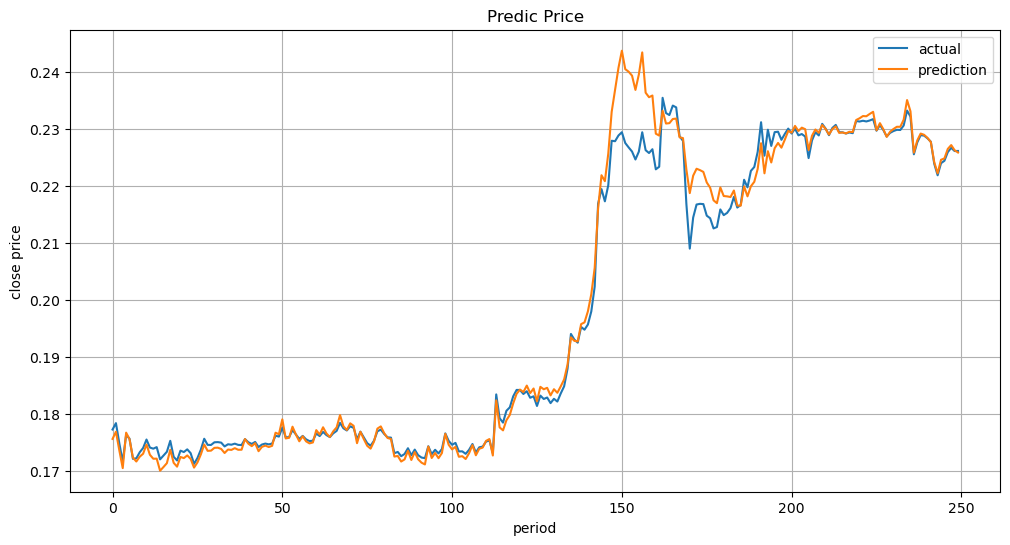

In [65]:
# predic PC-Model

plt.figure(figsize=(12, 6))
plt.title('Predic Price')
plt.xlabel('period')
plt.ylabel('close price')
plt.plot(cy_test, label='actual')
plt.plot(cy_preds, label='prediction')
plt.grid()
plt.legend(loc='best')

plt.show()

### 2-1-2. Calculation model used Not Normalization data

In [111]:
# 다항회귀 모델
pc_model = Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=False)),
                     ('lr',LinearRegression())])
pc_model.fit(ncx_train,ncy_train)
ncy_preds = pc_model.predict(ncx_test)

# 평가
nc_mse = mean_squared_error(ncy_test, ncy_preds)
nc_rmse = np.sqrt(nc_mse) 
print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(nc_mse , nc_rmse))

MSE : 45831433391.579 , RMSE : 214082.772


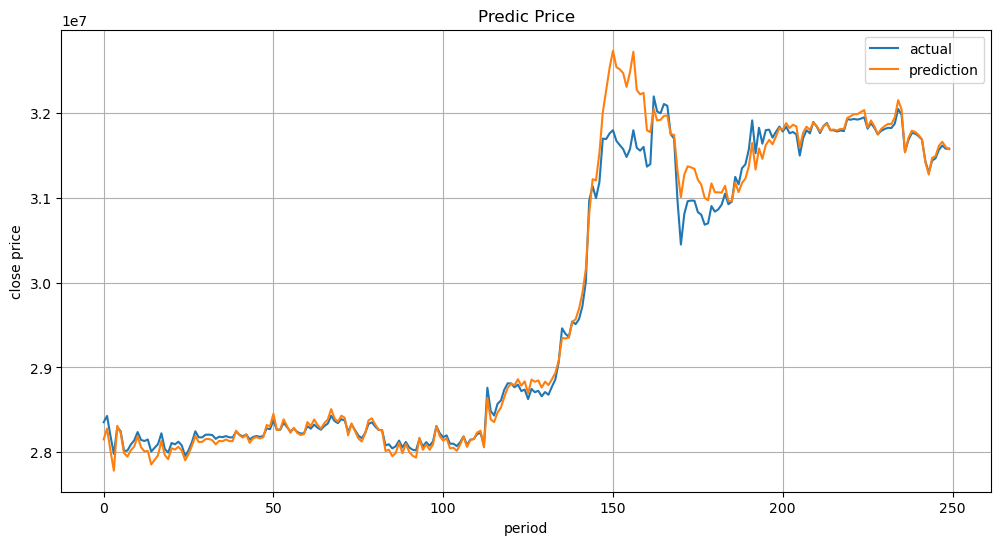

In [112]:
# predic PC-Model

plt.figure(figsize=(12, 6))
plt.title('Predic Price')
plt.xlabel('period')
plt.ylabel('close price')
plt.plot(ncy_test, label='actual')
plt.plot(ncy_preds, label='prediction')
plt.grid()
plt.legend(loc='best')

plt.show()

## 2-2. Price model

### 2-2-1. Price model used Normalization data

In [62]:
pp_model = Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=False)),
                     ('lr',LinearRegression())])
pp_model.fit(px_train,py_train)
py_preds = pp_model.predict(px_test)

# 평가
p_mse = mean_squared_error(py_test, py_preds)
p_rmse = np.sqrt(p_mse)
print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(p_mse , p_rmse))

MSE : 0.000 , RMSE : 0.001


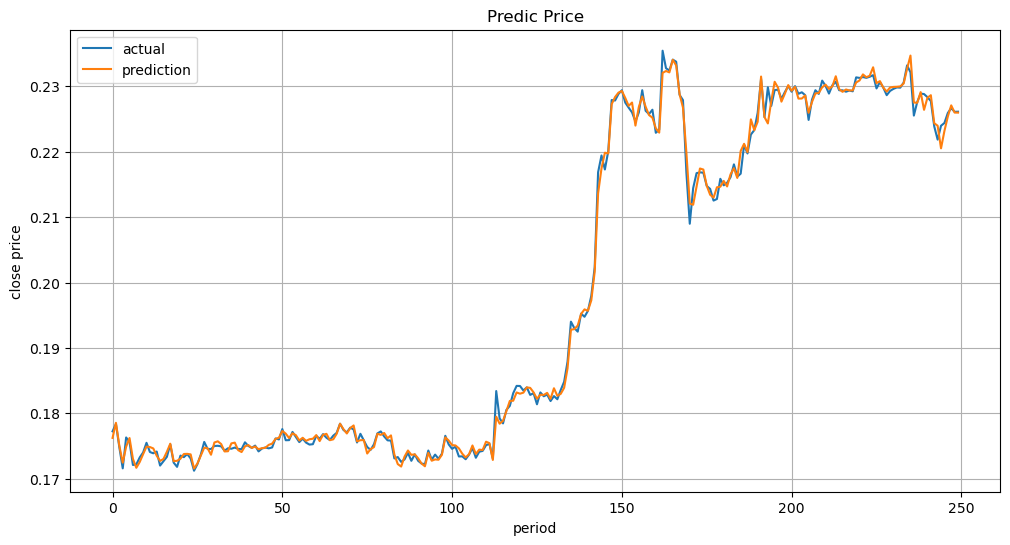

In [63]:
# predic PP-Model

plt.figure(figsize=(12, 6))
plt.title('Predic Price')
plt.xlabel('period')
plt.ylabel('close price')
plt.plot(py_test, label='actual')
plt.plot(py_preds, label='prediction')
plt.grid()
plt.legend(loc='best')

plt.show()

### 2-2-2. Price model used Not Normalization data

In [113]:
pp_model = Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=False)),
                     ('lr',LinearRegression())])
pp_model.fit(npx_train,npy_train)
npy_preds = pp_model.predict(npx_test)

# 평가
np_mse = mean_squared_error(npy_test, npy_preds)
np_rmse = np.sqrt(np_mse)
print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(np_mse , np_rmse))

MSE : 4207480868.902 , RMSE : 64865.097


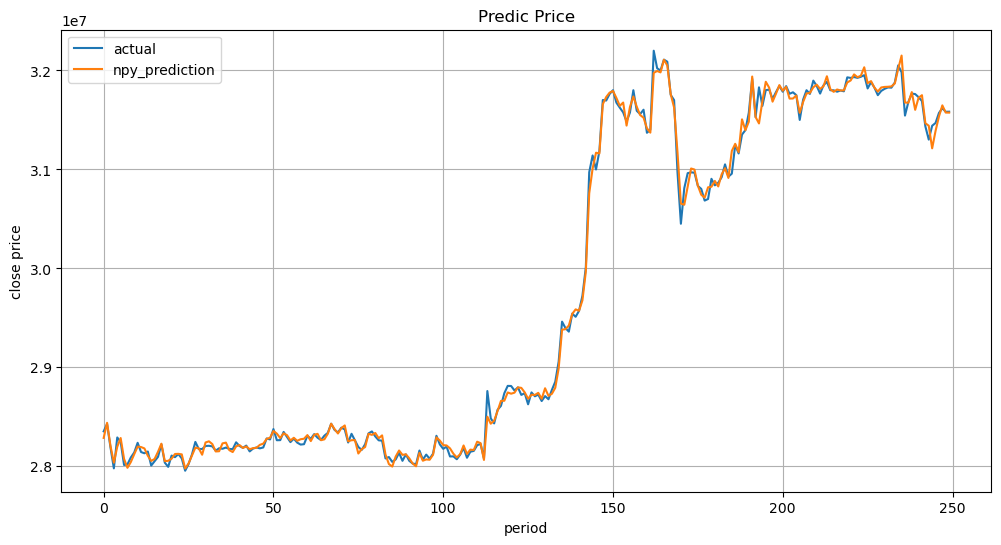

In [114]:
# predic PP-Model
#rf_p_pred = pd.DataFrame(p_l_scaler.inverse_transform(py_preds),columns=['pred_close'])

plt.figure(figsize=(12, 6))
plt.title('Predic Price')
plt.xlabel('period')
plt.ylabel('close price')
plt.plot(npy_test, label='actual')
#plt.plot(rf_p_pred, label='rpy_prediction')
plt.plot(npy_preds, label='npy_prediction')
plt.grid()
plt.legend(loc='best')

plt.show()

# 3. Save Predict Price

In [115]:
date_df = pd.DataFrame(cdf['candel_date_time'][-250:].to_numpy(), columns=['candel_date_time'])
act_df = pd.DataFrame(npy_test,columns=['close'])
ncy_df = pd.DataFrame(ncy_preds, columns=['prc_close'])
npy_df = pd.DataFrame(npy_preds, columns=['prp_close'])
pred_df = pd.concat([date_df['candel_date_time'],act_df['close'],ncy_df['prc_close'],npy_df['prp_close']], axis=1)
pred_df

,candel_date_time,close,prc_close,prp_close
0,2023-02-10 06:00:00,28354000.0,2.815134e+07,2.828743e+07
1,2023-02-10 07:00:00,28428000.0,2.827973e+07,2.844017e+07
2,2023-02-10 08:00:00,28193000.0,2.801787e+07,2.820744e+07
3,2023-02-10 09:00:00,27980000.0,2.778167e+07,2.803721e+07
4,2023-02-10 10:00:00,28292000.0,2.831155e+07,2.819826e+07
...,...,...,...,...
245,2023-02-20 11:00:00,31469000.0,3.149505e+07,3.138855e+07
246,2023-02-20 12:00:00,31570000.0,3.161692e+07,3.153394e+07
247,2023-02-20 13:00:00,31619000.0,3.166304e+07,3.164701e+07
248,2023-02-20 14:00:00,31582000.0,3.160115e+07,3.157414e+07


In [116]:
pred_df.to_csv('PredictPrice.csv',index=False,encoding='cp949')